In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [169]:
#path to the csv file and show the csv file

graph_data_path = "Resources/state_covid_data.csv"

graph_data = pd.read_csv(graph_data_path)

graph_data.head(9)

,Unnamed: 0,States,date,Total positive,Total negaitive,Total test,deaths
0,0,Alabama,April,6038.0,73879.0,79917.0,30
1,1,Alabama,August,38335.0,257485.0,289359.0,31
2,2,Alabama,July,49678.0,233137.0,280879.0,31
3,3,Alabama,June,20142.0,168957.0,184836.0,30
4,4,Alabama,March,981.0,6288.0,7269.0,19
5,5,Alabama,May,10884.0,119473.0,134111.0,31
6,6,Alabama,October,19827.0,118084.0,133536.0,19
7,7,Alabama,September,28643.0,135246.0,155658.0,30
8,8,Alaska,April,236.0,15170.0,15406.0,30


In [18]:
#count the number of unique values in the States Column

graph_data['States'].value_counts()

Illinois                    10
Washington                  10
Arizona                     10
California                  10
Utah                         9
Texas                        9
Nebraska                     9
Massachusetts                9
Wisconsin                    9
Oregon                       9
New Jersey                   8
South Dakota                 8
Northern Mariana Islands     8
North Dakota                 8
Puerto Rico                  8
Minnesota                    8
Virgin Islands               8
Mississippi                  8
New Mexico                   8
Tennessee                    8
Guam                         8
Alaska                       8
North Carolina               8
Maryland                     8
Colorado                     8
Vermont                      8
Michigan                     8
Pennsylvania                 8
Ohio                         8
Louisiana                    8
Georgia                      8
Idaho                        8
Kentucky

In [19]:
number_states = graph_data['States'].nunique()

print(f'There are {number_states} states in this data set.')

There are 55 states in this data set.


In [168]:
states_positive_df = graph_data.groupby(['States']).sum()

new_positive = states_positive_df.drop(columns=['Unnamed: 0', 'Total negaitive', 'Total test'])

new_positive.head(100)



,Total positive,deaths
States,,
Alabama,174528.0,221
Alaska,12432.0,222
Arizona,232935.0,268
Arkansas,100441.0,223
California,874024.0,269
Colorado,86372.0,229
Connecticut,64455.0,226
Delaware,23325.0,223
District of Columbia,16445.0,227


In [167]:
percentage_death_postive = new_positive['deaths']/new_positive['Total positive']

percentage_death_postive

States
Alabama                     0.001266
Alaska                      0.017857
Arizona                     0.001151
Arkansas                    0.002220
California                  0.000308
Colorado                    0.002651
Connecticut                 0.003506
Delaware                    0.009561
District of Columbia        0.013804
Florida                     0.000306
Georgia                     0.000677
Guam                        0.056400
Hawaii                      0.015987
Idaho                       0.004109
Illinois                    0.000762
Indiana                     0.001513
Iowa                        0.002194
Kansas                      0.003111
Kentucky                    0.002546
Louisiana                   0.001252
Maine                       0.037068
Maryland                    0.001675
Massachusetts               0.001801
Michigan                    0.001352
Minnesota                   0.001816
Mississippi                 0.002003
Missouri                    0.0

In [126]:
states_only = graph_data.drop(columns=['Unnamed: 0', 'date', 'Total positive', 
                                       'Total negaitive', 'Total test', 'deaths'])

new_states_only = states_only.drop_duplicates()

new_states_only

,States
0,Alabama
8,Alaska
16,Arizona
26,Arkansas
34,California
44,Colorado
52,Connecticut
60,Delaware
68,District of Columbia
76,Florida


In [129]:
states_list = new_states_only['States'].tolist()

print(states_list)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]


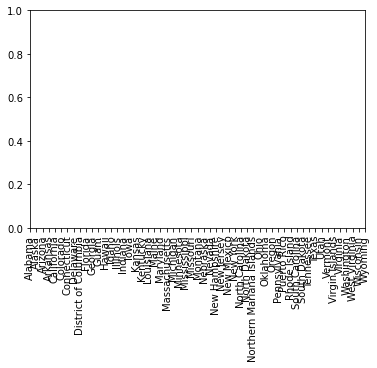

In [159]:
#x_axis = state amount

x_axis = np.arange(len(new_states_only))

print(x_axis)

tick_mark = [tick for tick in x_axis]

plt.xticks(tick_mark, ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
                       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 
                       'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 
                       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
                       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
                       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 
                       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 
                       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 
                       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], rotation = 'vertical')



plt.show()
